## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [24]:
reg_data = pd.read_csv("data/RegData.csv" , names= ["X","Y"])

#### Explore your data

In [25]:
reg_data.head()

,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [26]:
X = reg_data["X"].values
Y = reg_data["Y"].values

#### Explore your data

In [27]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [28]:
X = X.reshape(-1,1)
X.shape

(13, 1)

In [29]:
Y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

In [30]:
Y.reshape(-1,1).shape

(13, 1)

#### Plot the original data (scatter plot of X,y)

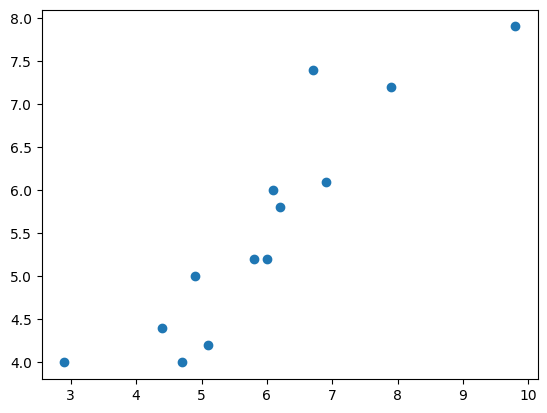

In [31]:
plt.scatter(X , Y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

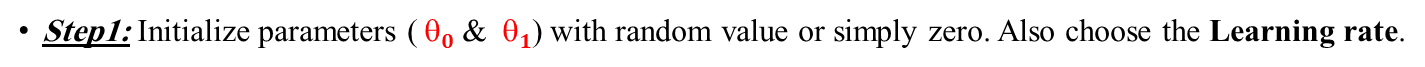

In [32]:
theta = 0.0
theta1 = np.zeros((X.shape[1],1))

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.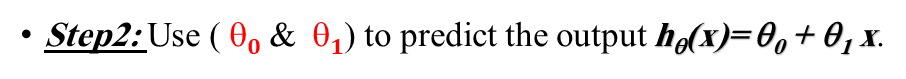
#### Note: you will need to iterate through all data points

In [33]:
y_pred = X.dot(theta1) + theta

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).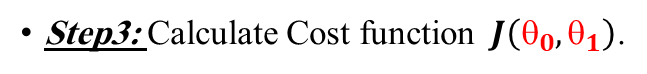
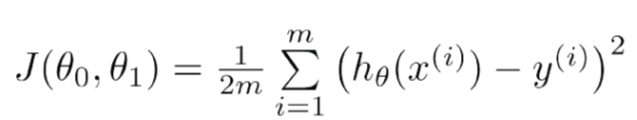

In [34]:
cost_function = (1/(2*len(Y))) * np.sum((y_pred - Y)**2)
cost_function

np.float64(211.96999823600012)

### Step4: Calculate the gradient.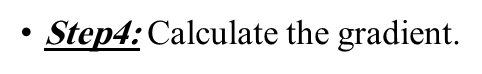
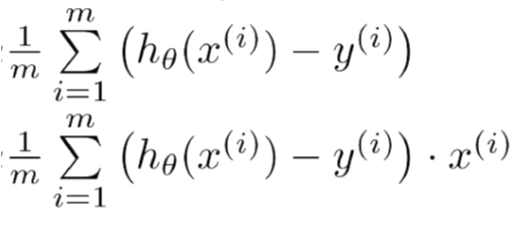

In [35]:
gradient_theta = (1/len(Y)) * np.sum(y_pred - Y)
gradient_theta1 = (1/len(Y)) * X.T.dot(y_pred - Y)
print(f"gradient_theta : {gradient_theta}\ngradient_theta1:{gradient_theta1}")

gradient_theta : -72.399999617
gradient_theta1:[[-23.81538464 -44.05846216 -29.76923081 -42.86769122 -47.03538524
  -36.31846102 -35.72307697 -34.53230887 -30.9599989  -25.00615274
  -23.81538464 -26.19692367 -30.9599989 ]]


### Step5: Update the parameters (simultaneously).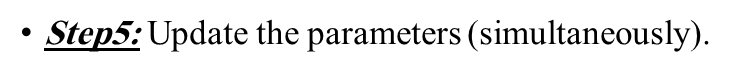
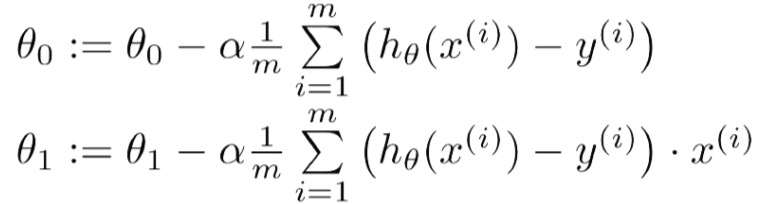

In [36]:
lr = 0.01
theta = theta - lr * gradient_theta
theta1 = theta1 - lr * gradient_theta1
print(f"theta : {theta}\ntheta1:{theta1}")

theta : 0.7239999961700001
theta1:[[0.23815385 0.44058462 0.29769231 0.42867691 0.47035385 0.36318461
  0.35723077 0.34532309 0.30959999 0.25006153 0.23815385 0.26196924
  0.30959999]]


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.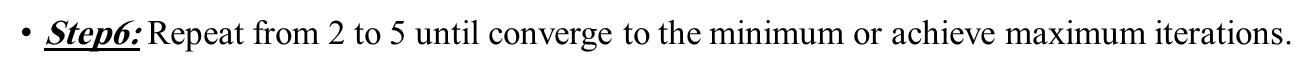

In [37]:
theta = 0
theta1 = np.zeros((X.shape[1],1))
l_r = 0.01
X = reg_data["X"].values
Y = reg_data["Y"].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [38]:
cost_function = (1/(2*len(Y))) * np.sum((y_pred - Y)**2)
num_iterations = 100
for i in range(num_iterations):
    y_pred = X.dot(theta1)+theta
    cost_function = (1/(2*len(Y))) * np.sum((y_pred - Y)**2)
    gradient_theta = (1/len(Y)) * np.sum(y_pred - Y)
    gradient_theta1 = (1/len(Y)) * X.T.dot(y_pred - Y)
    theta = theta - l_r * gradient_theta
    theta1 = theta1 - l_r * gradient_theta1
    if i % 10 == 0:
        print(f"Iteration {i} : Cost Function = {cost_function}")
print(f"Final theta : {theta}\nFinal theta1:{theta1}")

Iteration 0 : Cost Function = 16.305384479692318
Iteration 10 : Cost Function = 0.20197836678314676
Iteration 20 : Cost Function = 0.20037339836353346
Iteration 30 : Cost Function = 0.1995741732096101
Iteration 40 : Cost Function = 0.19878601397317405
Iteration 50 : Cost Function = 0.19800872930732502
Iteration 60 : Cost Function = 0.19724216916907295
Iteration 70 : Cost Function = 0.1964861855875423
Iteration 80 : Cost Function = 0.1957406326334756
Iteration 90 : Cost Function = 0.19500536639106275
Final theta : 0.22699667880902846
Final theta1:[[0.88319514]]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

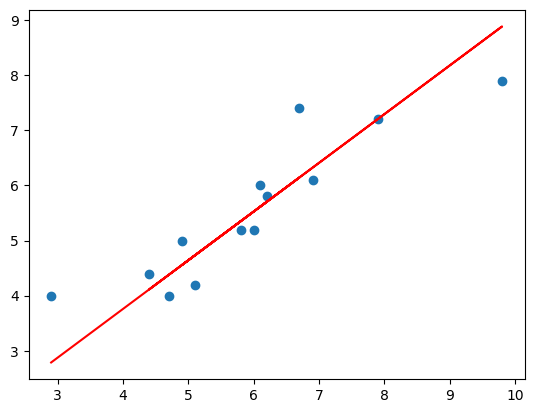

In [39]:
plt.scatter(X , Y)
plt.plot(X, X.dot(theta1) + theta, color='red')
plt.show()

#### Use R2 score to evaluate LR equation output
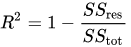
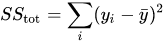
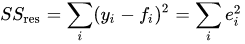
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [41]:
ssres =(np.sum((Y - (X.dot(theta1) + theta))**2))
sstot = np.sum((Y - np.mean(Y))**2)
r2_score = 1 - (ssres/sstot)
r2_score

np.float64(0.7563025293243408)

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [42]:
X = reg_data[["X"]].values.reshape(-1,1)
Y = reg_data[["Y"]].values.reshape(-1,1)

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [43]:
num_iterations = 100
lr = 0.01
theta = np.zeros((2,1))
X_b = np.c_[np.ones((len(Y),1)) , X]
for i in range(num_iterations):
    y_pred = X_b.dot(theta)
    cost_function = (1/(2*len(Y))) * np.sum((y_pred - Y)**2)
    gradient_theta = (1/len(Y)) * X_b.T.dot(y_pred - Y)
    theta = theta - lr * gradient_theta
    if i % 10 == 0:
        print(f"Iteration {i} : Cost Function = {cost_function}")

Iteration 0 : Cost Function = 16.305384479692318
Iteration 10 : Cost Function = 0.20197836678314676
Iteration 20 : Cost Function = 0.20037339836353346
Iteration 30 : Cost Function = 0.1995741732096101
Iteration 40 : Cost Function = 0.19878601397317405
Iteration 50 : Cost Function = 0.19800872930732502
Iteration 60 : Cost Function = 0.19724216916907295
Iteration 70 : Cost Function = 0.1964861855875423
Iteration 80 : Cost Function = 0.1957406326334756
Iteration 90 : Cost Function = 0.19500536639106275


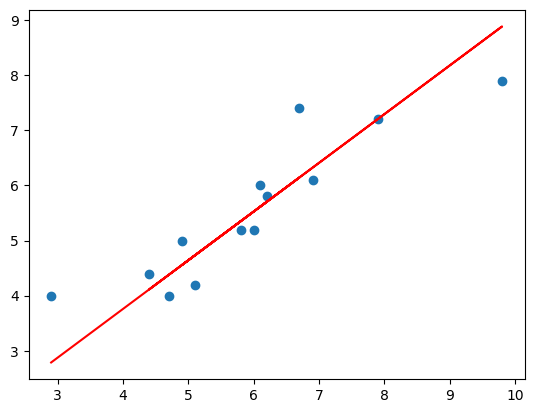

In [44]:
plt.scatter(X , Y)
plt.plot(X, X_b.dot(theta), color='red')
plt.show()

In [46]:
ssres = np.sum( ( Y - ( X_b.dot(theta) ) ) **2 )
sstot = np.sum( ( Y - np.mean(Y) ) **2)
r2_score = 1 - (ssres/sstot)
r2_score

np.float64(0.7563025293243408)

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [47]:
num_iterations = 100
lr = 0.01
theta = np.zeros((2,1))
X_b = np.c_[np.ones((len(Y),1)) , X]
loss = []
for i in range(num_iterations):
    y_pred = X_b.dot(theta)
    cost_function = (1/(2*len(Y))) * np.sum((y_pred - Y)**2)
    loss.append(cost_function)
    gradient_theta = (1/len(Y)) * X_b.T.dot(y_pred - Y)
    theta = theta - lr * gradient_theta
    if i % 10 == 0:
        print(f"Iteration {i} : Cost Function = {cost_function}")

Iteration 0 : Cost Function = 16.305384479692318
Iteration 10 : Cost Function = 0.20197836678314676
Iteration 20 : Cost Function = 0.20037339836353346
Iteration 30 : Cost Function = 0.1995741732096101
Iteration 40 : Cost Function = 0.19878601397317405
Iteration 50 : Cost Function = 0.19800872930732502
Iteration 60 : Cost Function = 0.19724216916907295
Iteration 70 : Cost Function = 0.1964861855875423
Iteration 80 : Cost Function = 0.1957406326334756
Iteration 90 : Cost Function = 0.19500536639106275


### Plot loss vs. iterations

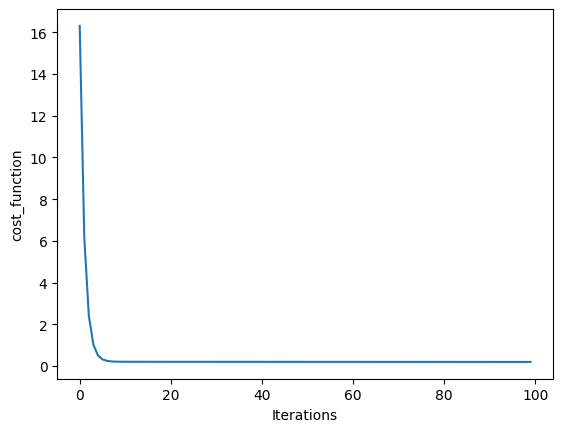

In [48]:
plt.plot(range(num_iterations) , loss)
plt.xlabel("Iterations")
plt.ylabel("cost_function")
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [49]:
df = pd.read_csv("data/MultipleLR.csv" , names = ["X1","X2","X3","Y"])
df.head()

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [50]:
x= df[["X1","X2","X3"]].values
x

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]])

In [51]:
x_b = np.c_[np.ones((x.shape[0] , 1)),x]
x_b

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [52]:
y = df[["Y"]].values.reshape(-1,1)
y

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]])

In [53]:
print(x_b.shape , y.shape)

(25, 4) (25, 1)


In [54]:
len(y)

25

### Repeat your implementation but for more than one variable

In [55]:
theta = np.zeros((x_b.shape[1],1))
num_iterations = 100
lr = 0.00001
loss = []
for i in range(num_iterations):
    y_pred = x_b.dot(theta)
    cost_function = (1/(2*len(y)))*np.sum((y_pred - y)**2)
    loss.append(cost_function)
    gradient_theta = (1/len(y)) * x_b.T.dot(y_pred - y)
    theta = theta - lr * gradient_theta
    if i % 10 == 0:
        print(f"Iteration {i} : Cost Function = {cost_function}")

Iteration 0 : Cost Function = 13405.98
Iteration 10 : Cost Function = 176.67756834060293
Iteration 20 : Cost Function = 8.034489369807977
Iteration 30 : Cost Function = 5.874054913579859
Iteration 40 : Cost Function = 5.835797948178916
Iteration 50 : Cost Function = 5.824635856780719
Iteration 60 : Cost Function = 5.813862697287979
Iteration 70 : Cost Function = 5.803137868625068
Iteration 80 : Cost Function = 5.792456846230784
Iteration 90 : Cost Function = 5.781819390257488


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

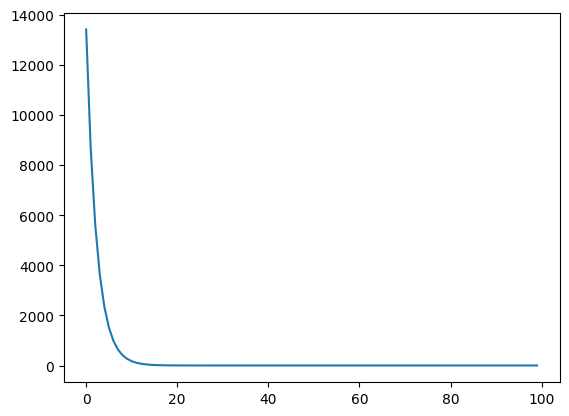

In [56]:
plt.plot(range(num_iterations) , loss)
plt.show()

#### Use R2 score to evaluate LR equation output

In [58]:
ssres = np.sum( (y - (x_b.dot(theta))) **2)
sstot = np.sum( (y - np.mean(y)) **2)
r2_score = 1 - (ssres/sstot)
r2_score

np.float64(0.9792027316970324)

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [59]:
from sklearn import linear_model
import pandas as pd

In [60]:
model = linear_model.LinearRegression()

#### Train the model (fit the model to the training data)

In [61]:
df = pd.read_csv("data/RegData.csv" , names = ["x","y"])
X = df["x"].values.reshape(-1,1)
y=df["y"]

In [62]:
model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Predict y values using the trained model

In [63]:
y_predicted = model.predict(X)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

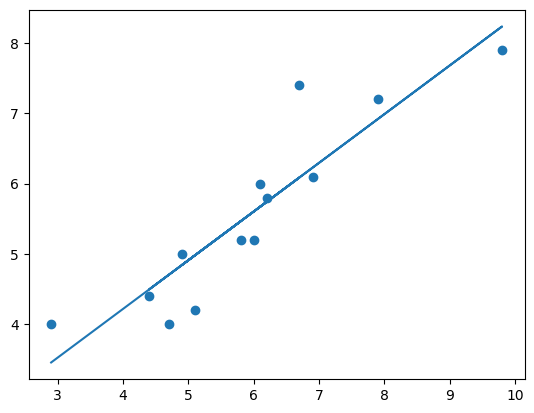

In [64]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,y_predicted)
plt.show()

#### Use R2 score to evaluate model output

In [65]:
from sklearn.metrics import r2_score
score = r2_score(y,y_predicted)
print(f"r2_score:{score}")

r2_score:0.8213156778363777


### Repeat for Mulivariate

In [66]:
mul = pd.read_csv("data/MultipleLR.csv" , names=["x1","x2","x3","y"],header=None)
mul.head()

,x1,x2,x3,y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [67]:
x_train = mul[["x1","x2","x3"]]
y = mul["y"]
model.fit(x_train,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [68]:
y_pred = model.predict(x_train)
y_pred

array([152.60720439, 185.08011472, 181.78158547, 199.74522647,
       139.1747207 , 103.69391793, 150.2632274 , 112.82069728,
       174.55948394, 164.49442094, 143.42337551, 142.23416416,
       186.54285759, 152.40794527, 151.24409108, 189.12496613,
       143.50219218, 181.89389361, 177.29838914, 158.34934019,
       176.57742415, 174.66365778, 167.68889392, 150.63279846,
       191.1954116 ])

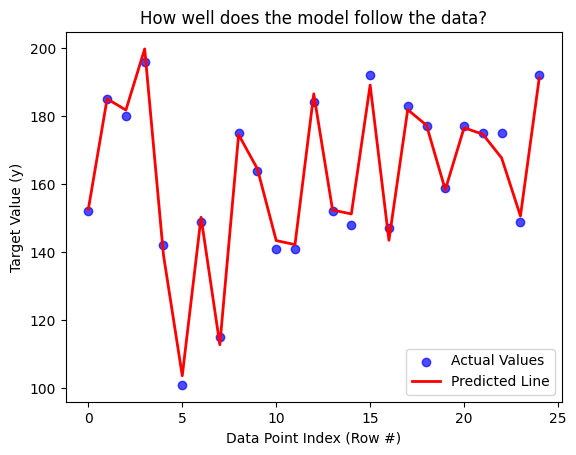

In [70]:
x_range = range(len(y))
plt.scatter(x_range, y, color='blue', label='Actual Values', alpha=0.7)
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('How well does the model follow the data?')
plt.xlabel('Data Point Index (Row #)')
plt.ylabel('Target Value (y)')
plt.legend()
plt.show()